# DATACAMP PROJECT

## Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). 
    
Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, on the 23rd of March of 2022, Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $800 billion. </p>
<p><center>

<img src="btc.png"> <br> 
<em>The astonishing increase of Bitcoin market capitalization in 2021.</em></center></p>
<p><sup>1</sup> <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile<sup>2</sup> and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. </p>
<p><em><sup>2</sup> <strong>Update on March 2020</strong>: Well, it turned out to be volatile indeed :D</em></p>
<p>That said, let's get to business. We will start with a CSV we conveniently downloaded on the 23rd of March of 2022 from coinmarketcap. </code></p>

*Note: The original dataset used in this guided project is from 2017. I downloaded an updated version of the dataset to present the updated analysis*



#### Importing Libraries

In [1]:
import pandas as pd
pd.options.display.float_format = '{:20,.5f}'.format

import matplotlib.pyplot as plt

#### Loading Dataset

In [2]:
crypto = pd.read_excel(r"C:\Users\GRACE ESTRADA\Desktop\march232022.xlsx", index_col = 2)
crypto.head()

,Rank,Name,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d
Symbol,,,,,,,,,
ARNX,2158,Aeron,"277,699.39000",0.01388,"20,007,160.66282",NaN,32.59770,31.91010,90.00000
BTSC,3993,BTS Chain,NaN,1.13000,0.00000,NaN,-0.00010,0.56940,30.82030
ZIK,3858,Ziktalk,NaN,0.01555,0.00000,NaN,0.03390,0.56500,20.21650
STREAM,2542,Streamit Coin,"44,644.71000",0.00330,"13,528,700.00000",NaN,-0.00190,-0.02230,5.39330
MTH,1215,Monetha,"4,365,865.60000",0.01085,"402,383,926.26728",NaN,-0.00140,-0.01000,3.54220


#### Counting the Number of Values

In [3]:
crypto[['Name','Market Cap']].count()

Name          2255
Market Cap    1952
dtype: int64

## Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>Name</code> and <code>Market Cap</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

#### Data Wrangling

In [4]:
#Removing crypto coins without capitalization
crypto = crypto[crypto['Market Cap'] > 0]

#Converting %change columns
crypto[['% 1h', '% 24h', '% 7d']] = crypto[['% 1h', '% 24h', '% 7d']] * 100
crypto.head()

#Selecting Market Cap data
market_cap = crypto[['Market Cap']]

## How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

#### Preparing the DataFrame

In [5]:
# Selecting the first 10 rows
top = market_cap.sort_values('Market Cap', ascending = False).head(10)

# Calculating market_cap_perc
top = top.assign(Percent = lambda x: top['Market Cap'] /top['Market Cap'].sum()) * 100

#### Data Visualization

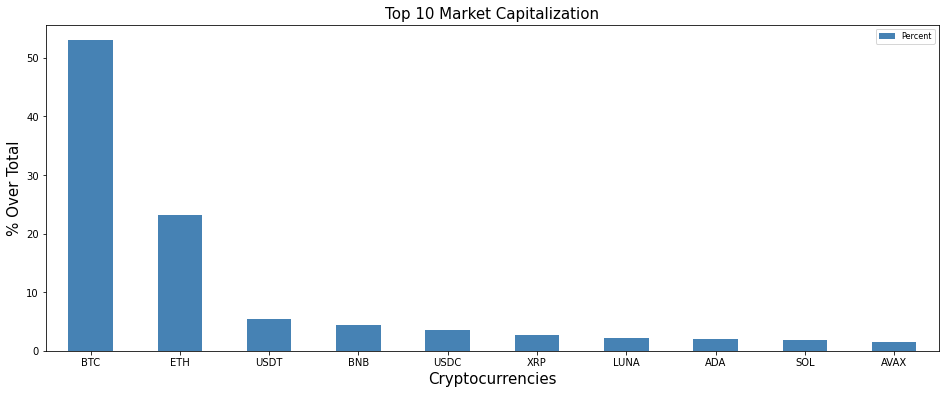

In [6]:
# Plotting the barplot 
ax = top['Percent'].plot(kind = 'bar', fontsize = 10, rot = 360, figsize = (16, 6), color = 'steelblue')

# Labelling the barplot
ax.set_title('Top 10 Market Capitalization', fontsize = 15)
ax.set_ylabel('% Over Total', fontsize = 15)
ax.set_xlabel('Cryptocurrencies', fontsize = 15)
ax.legend(fontsize = 8)

plt.show()

## What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

#### Preparing the Volatility DataFrame

In [7]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility_24hours = crypto[['Name','Market Cap','Price','% 24h']]
volatility_7days = crypto[['Name','Market Cap','Price','% 7d']]

# Sorting the DataFrames in ascending order
volatility_24hours = volatility_24hours.sort_values('% 24h',ascending = False)
volatility_7days = volatility_7days.sort_values('% 7d', ascending = False)

In [8]:
# Checking the first few rows
volatility_24hours.head()

,Name,Market Cap,Price,% 24h
Symbol,,,,
ARNX,Aeron,"277,699.39000",0.01388,"3,191.01000"
NOTE,DNotes,"31,714.06000",0.00023,298.55000
OWC,ODUWA,"1,376,767.52000",0.32870,167.77000
RNT,OneRoot Network,"1,135,956.38000",0.00400,132.99000
BUZZ,BUZZCoin,"545,039.22000",0.00003,120.76000


In [9]:
# Checking the first few rows
volatility_7days.head()

,Name,Market Cap,Price,% 7d
Symbol,,,,
ARNX,Aeron,"277,699.39000",0.01388,"9,000.00000"
STREAM,Streamit Coin,"44,644.71000",0.00330,539.33000
MTH,Monetha,"4,365,865.60000",0.01085,354.22000
SATT,SaTT,"9,286,460.64000",0.00286,347.66000
CSTL,Castle,"93,161.50000",0.00417,307.66000


## Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

#### Create a Data Visualization Function

In [23]:
#Defining a function with 2 parameters, the series to plot and the title

def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
    
    
    # Plotting with pandas the barchart for the top 10 losers
    volatility_series[:10].plot.bar(ax = ax[0], color = 'darkblue', rot = 45)
    
    # Setting the labels
    ax[0].set_ylabel('% change')
    ax[0].set_xlabel('')
    
    # Same as above, but for the top 10 winners
    volatility_series[-10:].plot.bar(ax = ax[1], color = 'darkred', rot = 45).invert_yaxis()
    
    # Setting the Setting the labels
    ax[1].set_ylabel('% change')
    ax[1].set_xlabel('')
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title, y = .95)
    
    # Returning this for good practice, might use later
    return fig, ax

#### Daily Series

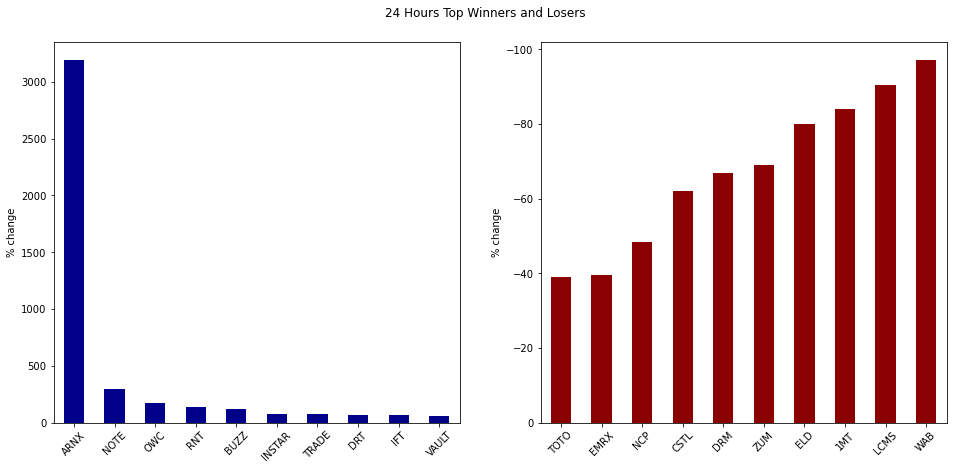

In [24]:
fig, ax = top10_subplot(volatility_24hours['% 24h'], title = "24 Hours Top Winners and Losers")

## 7. Ok, those are... interesting. Let's check the weekly Series too.
<p>3000% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

#### Weekly Series

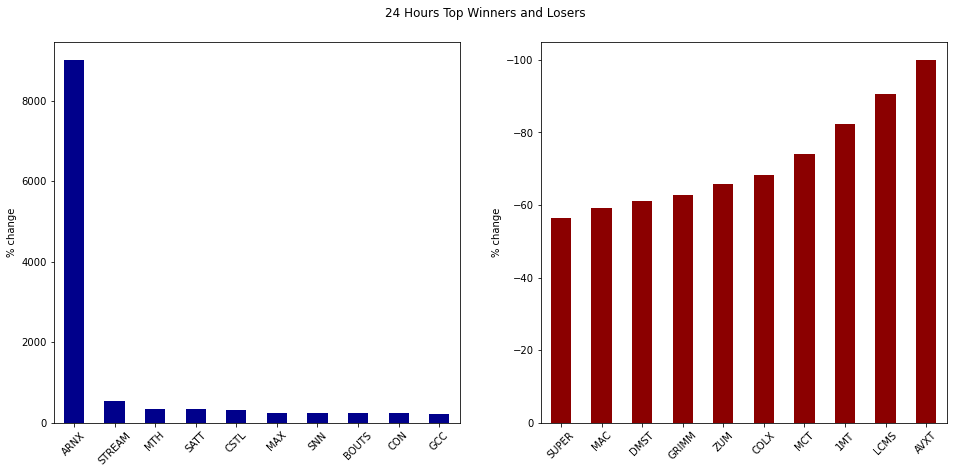

In [25]:
fig, ax = top10_subplot(volatility_7days['% 7d'], title = "24 Hours Top Winners and Losers")

## 8. How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

#### Cryptocurrencies with Market Capitalization greater than USD10B

In [13]:
largecaps = crypto[crypto['Market Cap'] > 10000000000]
largecaps

,Rank,Name,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d
Symbol,,,,,,,,,
AVAX,10,Avalanche,"22,636,838,970.73000",84.72000,"267,195,927.41655","1,451,610,365.09000",-2.06000,-5.54000,24.46000
ETH,2,Ethereum,"343,377,833,604.29999","2,860.46000","120,042,871.98713","12,684,727,326.19000",-0.38000,-2.91000,13.56000
SOL,9,Solana,"28,388,486,843.57000",88.61000,"320,375,655.60964","1,286,133,602.74000",-0.72000,-4.12000,12.26000
ADA,8,Cardano,"29,569,834,894.15000",0.87710,"33,713,185,376.98096","949,951,338.78000",-0.69000,-2.66000,10.88000
BTC,1,Bitcoin,"783,260,570,383.75000","41,247.82000","18,989,138.58681","20,127,946,682.25000",-0.19000,-2.23000,8.98000
WBTC,17,Wrapped Bitcoin,"11,253,279,811.45000","41,208.58000","273,080.98972","101,121,200.38000",-0.16000,-2.18000,8.84000
DOT,11,Polkadot,"18,407,139,481.67000",18.64000,"987,507,482.92221","688,372,540.70000",-0.41000,-3.72000,8.06000
BNB,4,BNB,"64,522,408,664.10000",390.77000,"165,116,075.09302","1,334,193,470.70000",-0.49000,-2.27000,7.99000
CRO,18,Cronos,"10,245,494,361.34000",0.40560,"25,260,094,579.24063","51,511,613.13000",-0.42000,-2.97000,7.58000


## Most coins are tiny!
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>

#### Visualization of Coins per Classification

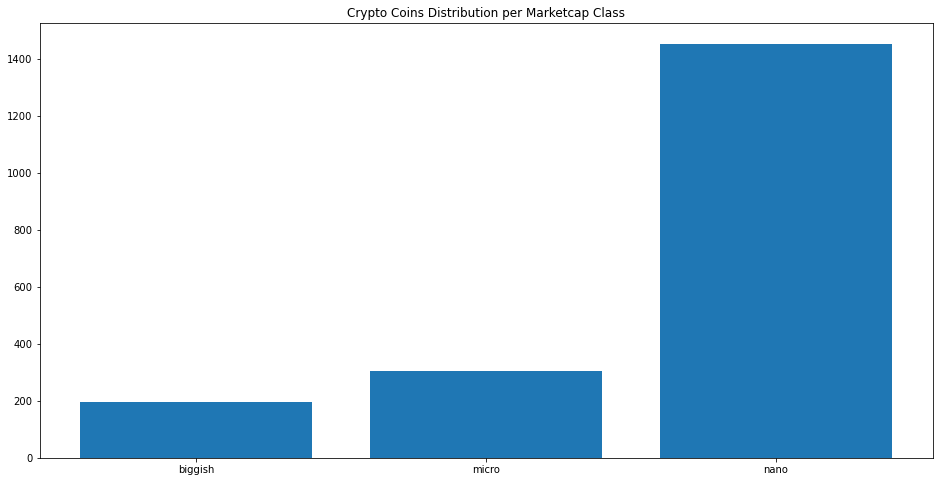

In [26]:
# Count of crypto coins per classification
biggish = crypto[crypto['Market Cap'] >= 300000000].shape[0]

# Same as above for micro ...
micro = crypto[(crypto['Market Cap'] > 50000000) & (crypto['Market Cap'] < 300000000)].shape[0]

# ... and for nano
nano = crypto[crypto['Market Cap'] < 50000000].shape[0]

# Making a list with the 3 counts
values = list([biggish, micro, nano]) 

# Labels for the plot
labels = ["biggish", "micro", "nano"]

# Plotting them with matplotlib 
plt.rcParams["figure.figsize"] = (16,8)
plt.bar(labels, values)
plt.title('Crypto Coins Distribution per Marketcap Class')
plt.show()

## 75% of crypto coins are considered Nano!

As the chart suggests, 75% of crypto coins have a capitalization of less than 50 Million USD.
Before investing in cryptocurrencies, always remember that smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones.

Though there may be chances that investing in nano coins will render greater rewards, the probability of it failing is almost as likely.
There are many factors to consider before one can forecast the value of a crypto coin, but it is worth exploring. It might be the topic for my next study. See ya! ;)